Here we demonstrate the generating of polyhedrons, whos feasible region is either empty or not. 
When given an appropriate cost vector the area contains a feasible solution. 

Additionally, we are keeping our decision variables (n) and our constraints (m) constant, since the problem of varying input dimension to our model significnatly increases the complexlixty of the project. This topic will be explored in more detail later in the further research section. This part of the project will likely be cut out and made into its own repository.

We plot the polyhedron (for n = 2) and label whether it is bounded or not. 
With the cost vector, if the feasible solution is unbounded we can simply take the dual of it and have an infeasible problem.

The linear program will take the standard form:
minimize: z = c'x
subject to: Ax <= b


A 
[[-1 -5]
 [-7  1]
 [ 3 10]]

b 
[9 3 5]

c 
[-8 -7]

[ 0.55541311 -0.8020268 ]


(array([[-0.34246575,  0.60273973],
        [-0.66666667, -1.66666667],
        [10.        , -3.8       ],
        [10.        , -2.5       ]]),
 array([ 0.55541311, -0.8020268 ]),
 <scipy.spatial._qhull.HalfspaceIntersection at 0x1a98c6ebeb0>)

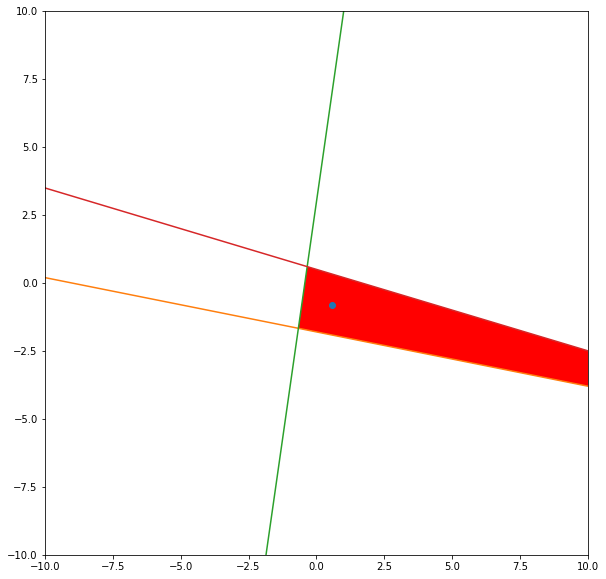

In [211]:
import matplotlib.pyplot as plt

import numpy as np
from scipy.spatial import HalfspaceIntersection, ConvexHull
from scipy.optimize import linprog

def feasible_point(A, b):
    # finds the center of the largest sphere fitting in the convex hull
    norm_vector = np.linalg.norm(A, axis=1)
    A_ = np.hstack((A, norm_vector[:, None]))
    b_ = b[:, None]
    c = np.zeros((A.shape[1] + 1,))
    c[-1] = -1
    res = linprog(c, A_ub=A_, b_ub=b[:, None], bounds=(None, None))
    return res.x[:-1]
    
def hs_intersection(A, b):
    interior_point = feasible_point(A, b)
    halfspaces = np.hstack((A, -b[:, None]))
    hs = HalfspaceIntersection(halfspaces, interior_point)
    return hs

def plt_halfspace(a, b, bbox, ax):
    if a[1] == 0:
        ax.axvline(b / a[0])
    else:
        x = np.linspace(bbox[0][0], bbox[0][1], 100)
        ax.plot(x, (b - a[0]*x) / a[1])

def add_bbox(A, b, xrange, yrange):
    A = np.vstack((A, [
        [-1,  0],
        [ 1,  0],
        [ 0, -1],
        [ 0,  1],
    ]))
    b = np.hstack((b, [-xrange[0], xrange[1], -yrange[0], yrange[1]]))
    return A, b

def solve_convex_set(A, b, bbox, ax=None):
    A_, b_ = add_bbox(A, b, *bbox)
    interior_point = feasible_point(A_, b_)
    hs = hs_intersection(A_, b_)
    points = hs.intersections
    hull = ConvexHull(points)
    return points[hull.vertices], interior_point, hs

def plot_convex_set(A, b, bbox, ax=None):
    # solve and plot just the convex set (no lines for the inequations)
    points, interior_point, hs = solve_convex_set(A, b, bbox, ax=ax)
    if ax is None:
        _, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(bbox[0])
    ax.set_ylim(bbox[1])
    ax.fill(points[:, 0], points[:, 1], 'r')
    return points, interior_point, hs

def plot_inequalities(A, b, c, bbox, ax=None):
    # solve and plot the convex set,
    # the inequation lines, and
    # the interior point that was used for the halfspace intersections
    points, interior_point, hs = plot_convex_set(A, b, bbox, ax=ax)
    ax.plot(*interior_point, 'o')
    print(interior_point)
    for a_k, b_k in zip(A, b):
        plt_halfspace(a_k, b_k, bbox, ax)
    return points, interior_point, hs

def generate_linear_program(n, m, lower_bound, upper_bound):

    a_matrix = np.random.randint(lower_bound,upper_bound,size = (m,n))
    b_vector = np.random.randint(lower_bound,upper_bound,size = (m))
    c_vector = np.random.randint(lower_bound,upper_bound,size = (n))

    # Making Ax <= b with b being positive
    for i in range(len(b_vector)):
        if b_vector[i] <= 0:
            b_vector[i] = b_vector[i] * -1
            a_matrix[i] = a_matrix[i] * -1
    
    return (a_matrix, b_vector, c_vector)

n = 2
m = 3

lower_bound = -10
upper_bound = 10

a_matrix, b_vector, c_vector = generate_linear_program(n,m,lower_bound,upper_bound)

print(f'A \n{a_matrix}\n')
print(f'b \n{b_vector}\n')
print(f'c \n{c_vector}\n')

plt.rcParams['figure.figsize'] = (10, 10)
bbox = [(-10, 10), (-10, 10)]
fig, ax = plt.subplots()
plot_inequalities(a_matrix, b_vector, c_vector, bbox, ax)

In [ ]:
import pulp

In [ ]:
import tensorflow as tf
from tensorflow import keras